# Handling by traditional method

In [1]:
import seaborn as sns

In [3]:
df=sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
df.isnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [9]:
df.shape

(891, 15)

In [14]:
df=df.dropna()
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
872,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [13]:
df.shape

(182, 15)

# Mean Value Imputation

<Axes: ylabel='Count'>

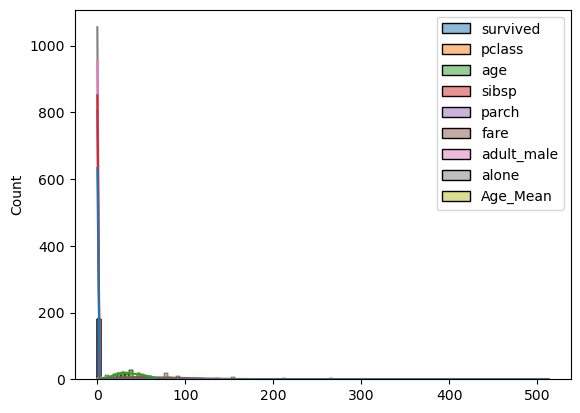

In [39]:
sns.histplot(df, kde=True)

<Axes: xlabel='age', ylabel='Count'>

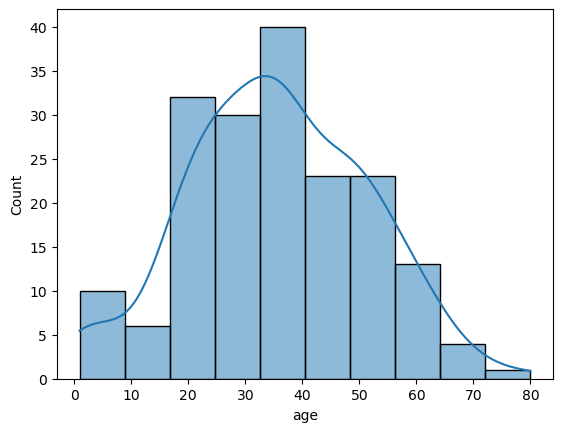

In [40]:
sns.histplot(df['age'], kde=True)

In [41]:
df['Age_Mean']=df['age'].fillna(df['age'].mean())

<Axes: xlabel='Age_Mean', ylabel='Count'>

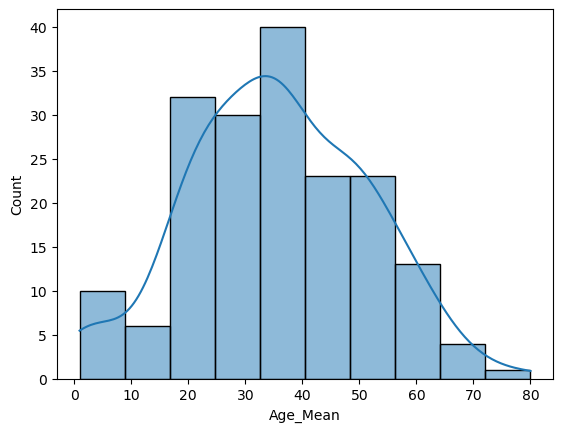

In [46]:
sns.histplot(df['Age_Mean'], kde=True)

# Median Value Imputation: we use this when we have outliers

<Axes: xlabel='fare', ylabel='Count'>

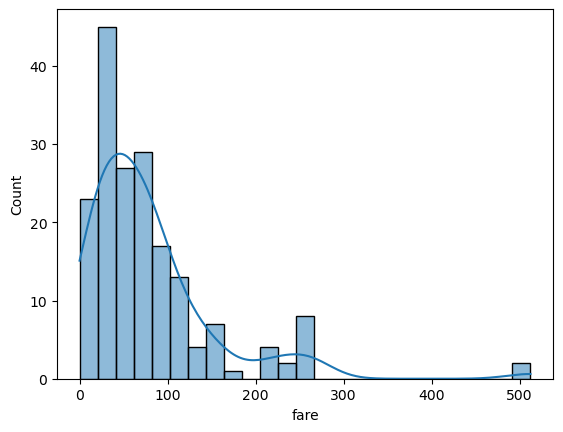

In [48]:
sns.histplot(df['fare'],kde=True)

In [49]:
df['NewFare']=df['fare'].fillna(df['fare'].mean())

<Axes: xlabel='NewFare', ylabel='Count'>

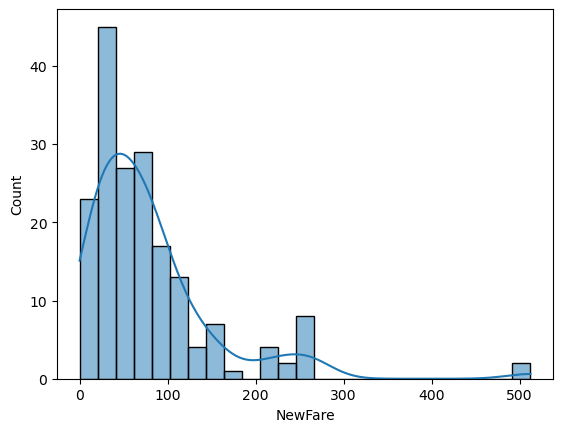

In [51]:
sns.histplot(df['NewFare'],kde=True)

# Mode Value Imputation

In [62]:
df['class']

1      First
3      First
6      First
10     Third
11     First
       ...  
871    First
872    First
879    First
887    First
889    First
Name: class, Length: 182, dtype: category
Categories (3, object): ['First', 'Second', 'Third']

In [61]:
df['class'].isnull()

1      False
3      False
6      False
10     False
11     False
       ...  
871    False
872    False
879    False
887    False
889    False
Name: class, Length: 182, dtype: bool

In [60]:
df['class'].unique()

['First', 'Third', 'Second']
Categories (3, object): ['First', 'Second', 'Third']

In [70]:
mode_value=df[df['class'].notna()]['class'].mode()[0]
mode_value

'First'